In [150]:
###################################################################
# Machine Learning - Regression
# model 1 / v.3 / Final
# Task - Predict salary
##################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
sal = pd.read_csv('merged_cbsa_salary.csv')

In [152]:
sal.head(5)

,Unnamed: 0,zip,function.,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,race,yearsinposition,yearsinprofession,age,cred1,cred2,highestdegree,inst1,inst2,inst3,inst4,inst5,instbudget,city,state,country,category,instsize,insttype,ZCTA5,cbsa,total_population,Median_Household_Income,no_male_hs,no_female_hs,no_hs,at_least_hs_male,at_least_hs_female,at_least_hs,hs_some_college_male,hs_some_college_female,hs_some_college,bachelors_male,bachelors_female,bachelors,at_least_bach_male,at_least_bach_female,at_least_bach,graduate_male,graduate_female,graduate,hispanic,white,black,native_american,asian_api,two_race_or_more,asian_api_total,latino_total,white_total,native_american_total,two_race_or_more_total,male_unemployment,female_unemployment,snap,renter,owner,median_rent,Sex.by.Age..Male.,Sex.by.Age..Male..Under.5.years,Sex.by.Age..Male..5.to.9.years,Sex.by.Age..Male..10.to.14.years,Sex.by.Age..Male..15.to.17.years,Sex.by.Age..Male..18.and.19.years,Sex.by.Age..Male..20.years,Sex.by.Age..Male..21.years,Sex.by.Age..Male..22.to.24.years,Sex.by.Age..Male..25.to.29.years,Sex.by.Age..Male..30.to.34.years,Sex.by.Age..Male..35.to.39.years,Sex.by.Age..Male..40.to.44.years,Sex.by.Age..Male..45.to.49.years,Sex.by.Age..Male..50.to.54.years,Sex.by.Age..Male..55.to.59.years,Sex.by.Age..Male..60.and.61.years,Sex.by.Age..Male..62.to.64.years,Sex.by.Age..Male..65.and.66.years,Sex.by.Age..Male..67.to.69.years,Sex.by.Age..Male..70.to.74.years,Sex.by.Age..Male..75.to.79.years,Sex.by.Age..Male..80.to.84.years,Sex.by.Age..Male..85.years.and.over,Sex.by.Age..Female.,Sex.by.Age..Female..Under.5.years,Sex.by.Age..Female..5.to.9.years,Sex.by.Age..Female..10.to.14.years,Sex.by.Age..Female..15.to.17.years,Sex.by.Age..Female..18.and.19.years,Sex.by.Age..Female..20.years,Sex.by.Age..Female..21.years,Sex.by.Age..Female..22.to.24.years,Sex.by.Age..Female..25.to.29.years,Sex.by.Age..Female..30.to.34.years,Sex.by.Age..Female..35.to.39.years,Sex.by.Age..Female..40.to.44.years,Sex.by.Age..Female..45.to.49.years,Sex.by.Age..Female..50.to.54.years,Sex.by.Age..Female..55.to.59.years,Sex.by.Age..Female..60.and.61.years,Sex.by.Age..Female..62.to.64.years,Sex.by.Age..Female..65.and.66.years,Sex.by.Age..Female..67.to.69.years,Sex.by.Age..Female..70.to.74.years,Sex.by.Age..Female..75.to.79.years,Sex.by.Age..Female..80.to.84.years,Sex.by.Age..Female..85.years.and.over,under_18,over_65,commute_over_60,full_time,part_time,high_rent_burden,extreme_rent_burden,foreign_born,US_born,adults_same_home,child_same_home,gini,child_medicaid,adult_medicaid,Types.of.Health.Insurance.Coverage.by.Age..Total.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.employer.based.health.insurance.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.direct.purchase.health.insurance.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.Medicare.coverage.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.Medicaid.means.tested.public.coverage.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.TRICARE.military.health.coverage.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.VA.Health.Care.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.two.or.more.types.of.health.insurance.coverage.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.two.or.more.types.of.health.insurance.coverage..With.employer.based.and.direct.purchase.coverage,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.two.or.more.types.of.health.insurance.coverage..With.employer.based.

In [19]:
# list(sal.columns.values)

----------------------------------------------------------------------------------------------------
Descriptive stats for salary
----------------------------------------------------------------------------------------------------
count      2185.000000
mean      48756.163901
std       18379.834517
min       10000.000000
25%       37455.000000
50%       44000.000000
75%       55656.000000
max      207060.000000
Name: salary, dtype: float64




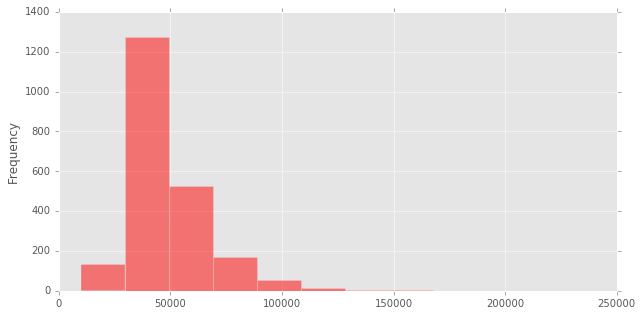

In [153]:
##################################################################
# Utility functions
##################################################################

import matplotlib
matplotlib.style.use('ggplot')

def stats(inSet,feature):
    '''Statistics and distribution for features'''
    # look at descriptive stats and histogram for feature
    # col labels
    # print(inSet[1:1])
    # run stats
    plt.figure(figsize=(10,5))
    print('-'*100)
    print('Descriptive stats for %s' % feature)
    print('-'*100)
    print(inSet[feature].describe())
    print('\n')
    inSet[feature].plot(bins=10, kind='hist', alpha=0.5, subplots=True, color='Red')
    
    
stats(sal, 'salary')


In [154]:
##################################################################
# Descriptive stats
##################################################################

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
sal.describe()


,Unnamed: 0,zip,sup1,sup2,sup3,sup4,sup5,salary,disabled,yearsinposition,yearsinprofession,age,cred1,cred2,inst1,inst2,inst3,inst4,inst5,instbudget,instsize,ZCTA5,cbsa,total_population,Median_Household_Income,no_male_hs,no_female_hs,no_hs,at_least_hs_male,at_least_hs_female,at_least_hs,hs_some_college_male,hs_some_college_female,hs_some_college,bachelors_male,bachelors_female,bachelors,at_least_bach_male,at_least_bach_female,at_least_bach,graduate_male,graduate_female,graduate,hispanic,white,black,native_american,asian_api,two_race_or_more,asian_api_total,latino_total,white_total,native_american_total,two_race_or_more_total,male_unemployment,female_unemployment,snap,renter,owner,median_rent,Sex.by.Age..Male.,Sex.by.Age..Male..Under.5.years,Sex.by.Age..Male..5.to.9.years,Sex.by.Age..Male..10.to.14.years,Sex.by.Age..Male..15.to.17.years,Sex.by.Age..Male..18.and.19.years,Sex.by.Age..Male..20.years,Sex.by.Age..Male..21.years,Sex.by.Age..Male..22.to.24.years,Sex.by.Age..Male..25.to.29.years,Sex.by.Age..Male..30.to.34.years,Sex.by.Age..Male..35.to.39.years,Sex.by.Age..Male..40.to.44.years,Sex.by.Age..Male..45.to.49.years,Sex.by.Age..Male..50.to.54.years,Sex.by.Age..Male..55.to.59.years,Sex.by.Age..Male..60.and.61.years,Sex.by.Age..Male..62.to.64.years,Sex.by.Age..Male..65.and.66.years,Sex.by.Age..Male..67.to.69.years,Sex.by.Age..Male..70.to.74.years,Sex.by.Age..Male..75.to.79.years,Sex.by.Age..Male..80.to.84.years,Sex.by.Age..Male..85.years.and.over,Sex.by.Age..Female.,Sex.by.Age..Female..Under.5.years,Sex.by.Age..Female..5.to.9.years,Sex.by.Age..Female..10.to.14.years,Sex.by.Age..Female..15.to.17.years,Sex.by.Age..Female..18.and.19.years,Sex.by.Age..Female..20.years,Sex.by.Age..Female..21.years,Sex.by.Age..Female..22.to.24.years,Sex.by.Age..Female..25.to.29.years,Sex.by.Age..Female..30.to.34.years,Sex.by.Age..Female..35.to.39.years,Sex.by.Age..Female..40.to.44.years,Sex.by.Age..Female..45.to.49.years,Sex.by.Age..Female..50.to.54.years,Sex.by.Age..Female..55.to.59.years,Sex.by.Age..Female..60.and.61.years,Sex.by.Age..Female..62.to.64.years,Sex.by.Age..Female..65.and.66.years,Sex.by.Age..Female..67.to.69.years,Sex.by.Age..Female..70.to.74.years,Sex.by.Age..Female..75.to.79.years,Sex.by.Age..Female..80.to.84.years,Sex.by.Age..Female..85.years.and.over,under_18,over_65,commute_over_60,full_time,part_time,high_rent_burden,extreme_rent_burden,foreign_born,US_born,adults_same_home,child_same_home,gini,child_medicaid,adult_medicaid,Types.of.Health.Insurance.Coverage.by.Age..Total.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.employer.based.health.insurance.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.direct.purchase.health.insurance.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.Medicare.coverage.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.Medicaid.means.tested.public.coverage.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.TRICARE.military.health.coverage.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.one.type.of.health.insurance.coverage..With.VA.Health.Care.only,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.two.or.more.types.of.health.insurance.coverage.,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.two.or.more.types.of.health.insurance.coverage..With.employer.based.and.direct.purchase.coverage,Types.of.Health.Insurance.Coverage.by.Age..Under.18.years..With.two.or.more.types.of.health.insurance.coverage..With.employer.based.and.Medicare.coverage,Types.of.Health.Insurance.Coverage.by.Age..Under.18

In [395]:
##################################################################
# Get features names
##################################################################
# sal.columns.to_series().groupby(sal.dtypes).groups

In [155]:
##################################################################
# Eliminate rows with missing Y values (NaN)
# removing salary as we cannot impute that
##################################################################

sal['missingSalary'] = pd.isnull(sal['salary'])
salary_clean = sal[(sal.missingSalary == False)]

In [156]:
##################################################################
# Subset X Numerical Features
##################################################################

X_numeric_features = [
  'zip',
  'sup1',
  'sup2',
  'sup3',
  'sup4',
  'sup5',
  'inst1',
  'inst2',
  'inst3',
  'inst4',
  'inst5',
  'ZCTA5',
  'cbsa',
  'total_population',
  'Median_Household_Income',
  'asian_api_total',
  'latino_total',
  'white_total',
  'native_american_total',
  'two_race_or_more_total',
  'median_rent',
  'yearsinposition',
  'yearsinprofession',
  'age',
  'instbudget',
  'instsize',
  'no_male_hs',
  'no_female_hs',
  'no_hs',
  'at_least_hs_male',
  'at_least_hs_female',
  'at_least_hs',
  'hs_some_college_male',
  'hs_some_college_female',
  'hs_some_college',
  'bachelors_male',
  'bachelors_female',
  'bachelors',
  'at_least_bach_male',
  'at_least_bach_female',
  'at_least_bach',
  'graduate_male',
  'graduate_female',
  'graduate',
  'hispanic',
  'white',
  'black',
  'native_american',
  'asian_api',
  'two_race_or_more',
  'male_unemployment',
  'female_unemployment',
  'snap',
  'renter',
  'owner',
  'under_18',
  'over_65',
  'commute_over_60',
  'full_time',
  'part_time',
  'high_rent_burden',
  'extreme_rent_burden',
  'foreign_born',
  'US_born',
  'adults_same_home',
  'child_same_home',
  'gini',
  'child_medicaid',
  'adult_medicaid',
  'married',
  'divorced',
  'bad_english',
  'poverty'    
]

X_numeric = salary_clean[X_numeric_features]



In [157]:
##################################################################
# Automating the dummy variable creation
# Subset X categorical features and create dummy variables
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
##################################################################

X_categorical_features = ['function.', 'gender', 'race', 'highestdegree', 'category', 'insttype', 'city', 'state']
# check groups
X_categorical_groups = salary_clean[X_categorical_features].columns.to_series().groupby(sal.dtypes).groups
print(X_categorical_groups)

def toDummy(vect):
    appended_data = []
    
    for val in X_categorical_features:
        dummy = pd.get_dummies(salary_clean[val])
        appended_data.append(dummy)

    appended_data = pd.concat(appended_data, axis=1)
    return appended_data

X_dummy = toDummy(X_categorical_features) 
X_dummy_features = X_dummy.as_matrix()

# check shape of dummy dataframe
print(X_dummy.shape)



{dtype('O'): ['function.', 'gender', 'race', 'highestdegree', 'category', 'insttype', 'city', 'state']}
(2185, 288)


In [158]:
##################################################################
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html
##################################################################

# default is imputing it with the mean
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [159]:
##################################################################
# create X - concat numeric and dummy variables
##################################################################

X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [160]:
##################################################################
# create Y - subset salary
##################################################################

y = salary_clean['salary'].values
y[0:10]

array([ 77308.,  38120.,  55335.,  70863.,  56557.,  48489.,  55557.,
        38120.,  40500.,  40500.])

In [161]:
# check imputed values
np.isnan(X_numeric_imputed).sum()

0

In [162]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [197]:
##################################################################
# Report function
##################################################################

def report(model, modelLabel):
    # The coefficients
    # print('Coefficients: \n', model.coef_)
    # The mean square error
    print('-' * 100)
    print('#### TEST SET #### ')
    print('-' * 100)    
    # The intercept
    print('Intercept: \n', model.intercept_)
    print('-' * 100)        
    print("Residual sum of squares, test data: %.2f"
          % np.mean((model.predict(X_test) - y_test) ** 2))        
    # Explained variance score: 1 is perfect prediction
    print('-' * 100)
    print('Variance score, test data: %.2f' % model.score(X_test, y_test))
    #vector of prediction error
    print('-' * 100)
    print("Mean Squared Error, test data: %d"
      % np.mean((model.predict(X_test) - y_test) ** 2))
    print('-' * 100)

    print('Distribution of prediction error on test data:')
    predError = model.predict(X_test) - y_test
    plt.hist(predError)
    plt.show()  

    print('-' * 100)
    print('#### TRAIN SET #### ')
    print('-' * 100)   
    print("Residual sum of squares, training data: %.2f"
          % np.mean((model.predict(X_train) - y_train) ** 2))
    print('-' * 100)   
    print('Variance score, training data: %.2f' % model.score(X_train, y_train))
    print('-' * 100)
    print("Mean Squared Error, training data: %d"
      % np.mean((model.predict(X_train) - y_train) ** 2))    
    print('-' * 100)


    print('Distribution of prediction error on training data:')
    predError = model.predict(X_train) - y_train
    plt.hist(predError)
    plt.show()

    var_to_graph[modelLabel] = np.mean((model.predict(X_test) - y_test) ** 2)

    
def plotModel(model):
    print('-' * 100)   
    print('Plot TEST set:')
    print('-' * 100)   
      
    plt.figure(figsize=(20,10))

    x = model.predict(X_test)
    plt.scatter(x, y_test,  color='black', alpha=0.4)
    plt.plot(x, x, color='red',
             linewidth=1)
    plt.show()

    print('-' * 100)   
    print('Plot TRAIN set:')
    print('-' * 100)

    plt.figure(figsize=(20,10))

    x = model.predict(X_train)
    plt.scatter(x, y_train,  color='black', alpha=0.4)
    plt.plot(x, x, color='red',
             linewidth=1)
    plt.show()

----------------------------------------------------------------------------------------------------
#### TEST SET #### 
----------------------------------------------------------------------------------------------------
Intercept: 
 -21066.246751
----------------------------------------------------------------------------------------------------
Residual sum of squares, test data: 82938615.98
----------------------------------------------------------------------------------------------------
Variance score, test data: 0.78
----------------------------------------------------------------------------------------------------
Mean Squared Error, test data: 82938615
----------------------------------------------------------------------------------------------------
Distribution of prediction error on test data:


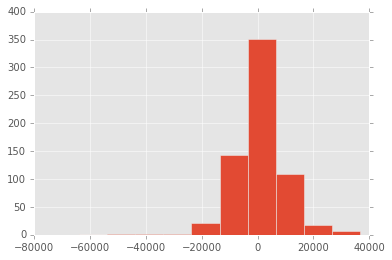

----------------------------------------------------------------------------------------------------
#### TRAIN SET #### 
----------------------------------------------------------------------------------------------------
Residual sum of squares, training data: 61760482.78
----------------------------------------------------------------------------------------------------
Variance score, training data: 0.81
----------------------------------------------------------------------------------------------------
Mean Squared Error, training data: 61760482
----------------------------------------------------------------------------------------------------
Distribution of prediction error on training data:


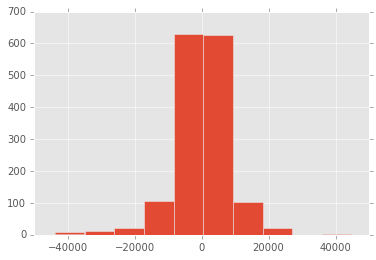

----------------------------------------------------------------------------------------------------
Plot TEST set:
----------------------------------------------------------------------------------------------------


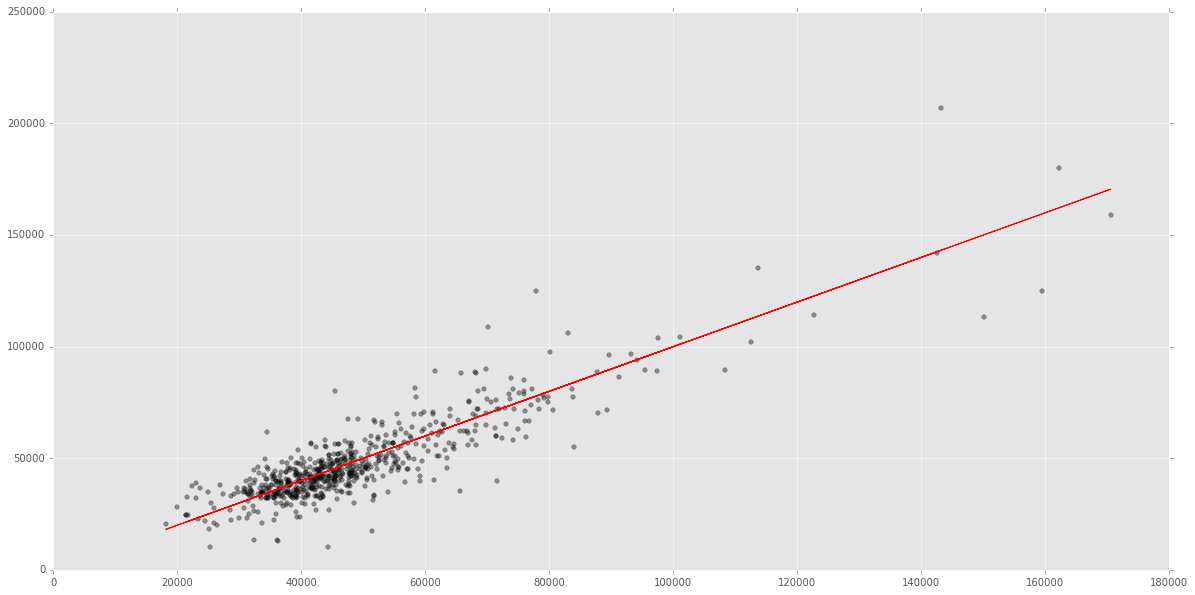

----------------------------------------------------------------------------------------------------
Plot TRAIN set:
----------------------------------------------------------------------------------------------------


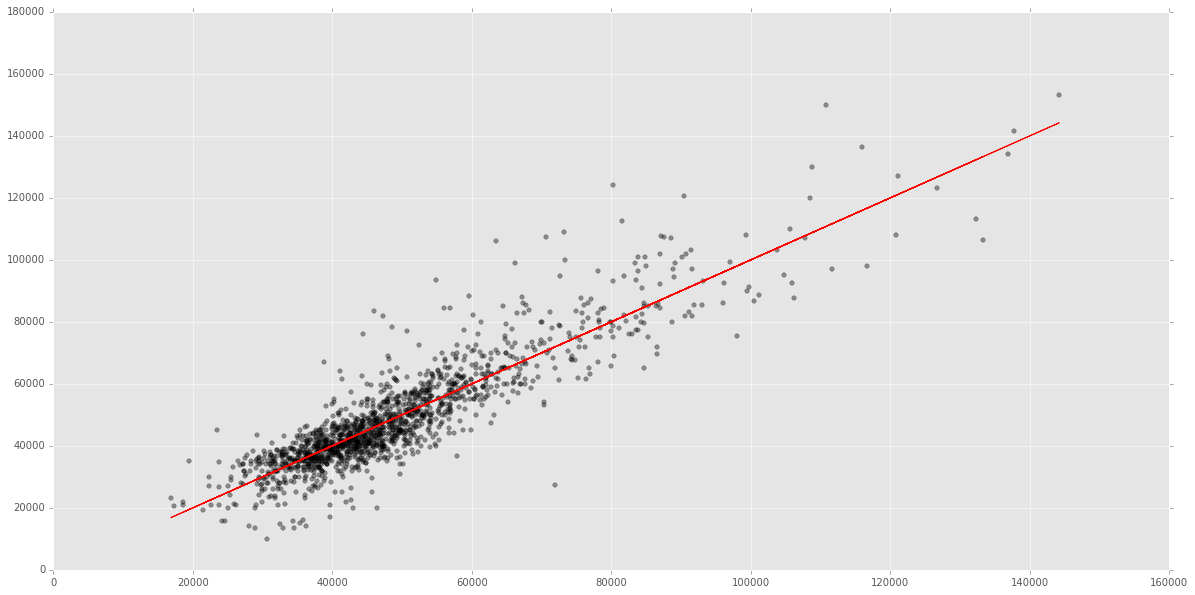

In [198]:
##################################################################
# RIDGE REGRESSION
# reguralization - adds a contant to the features. Corrects the effect of extreme values on the model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
##################################################################

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
from sklearn import linear_model
regr_ridge = linear_model.Ridge(alpha = 3, tol=0.001)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr_ridge.fit(X_train, y_train)

report( regr_ridge ,'multReg_ridge' )
plotModel(regr_ridge)


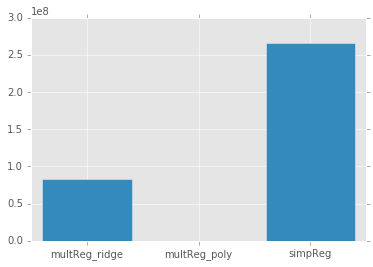

In [168]:
# bar graph of dict with Residual Sum of Squares on test datasets
var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()